# Analyse graphique Work In Progress

In [23]:
# import des bibliotheques 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [24]:
# import des données
data_amelie = pd.read_csv("donnee_temp/depense_age.csv",dtype={
    'annee':'uint16'
    ,'patho_niv1':'category'
    ,'patho_niv2':'category'
    ,'patho_niv3':'category'
    ,'top':'category'
    ,'dep_niv_1':'category'
    ,'dep_niv_2':'category'
    ,'montant':'uint64'
    ,'nombre de patients traités pour la pathologie selectionnée ':'float64'
    ,'nombre de patient traités pour une autre pathologie mais necessitant des soins du poste':'float64'
    ,'montant_moy':'float64'
    ,'type_somme':'category'
    ,'sexe':'uint8'
    ,'cla_age_5':'category'
    ,'Ntop':'uint32'
})

In [25]:
# config graphe
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [26]:
# fonction pour funcformatter

def nombre_en_milliard(nb,pos):
    return format(round(nb/(10e9)),'_').replace("_"," ")



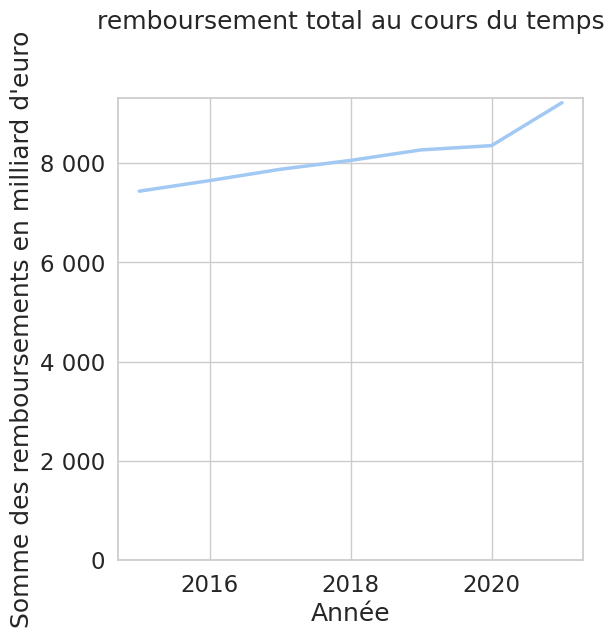

In [27]:
# regoupement des datas pour affichages
data_annee = data_amelie.groupby(by=['annee'],observed=False).agg(montant=('montant','sum'),
montant_moyen=('montant_moy','mean')).reset_index()

# affichage
fig,ax = plt.subplots()
sns.lineplot(ax=ax,data=data_annee,x='annee',y='montant')
fig.set_size_inches(6,6)
ax.set_title('remboursement total au cours du temps',pad=50)
ax.set_xlabel('Année')
ax.set_ylabel('Somme des remboursements en milliard d\'euro')
ax.yaxis.set_major_formatter(FuncFormatter(nombre_en_milliard))
ax.set_ylim(0)
plt.show()

#suppression des données en ram
del data_annee

In [28]:
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014300 entries, 0 to 1014299
Data columns (total 15 columns):
 #   Column                                                                                   Non-Null Count    Dtype   
---  ------                                                                                   --------------    -----   
 0   annee                                                                                    1014300 non-null  uint16  
 1   patho_niv1                                                                               1014300 non-null  category
 2   patho_niv2                                                                               868770 non-null   category
 3   patho_niv3                                                                               745290 non-null   category
 4   top                                                                                      1014300 non-null  category
 5   dep_niv_1                          